ZADANIE 1


In [3]:
library(ggplot2)
library(caret)
library(MASS)

In [6]:
biopsy <- na.omit(biopsy)
head(biopsy)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant


In [7]:
table(biopsy$class)


   benign malignant 
      444       239 

In [8]:
model <- glm(class ~ . - ID, biopsy, family=binomial)
summary(model)


Call:
glm(formula = class ~ . - ID, family = binomial, data = biopsy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4841  -0.1153  -0.0619   0.0222   2.4698  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.10394    1.17488  -8.600  < 2e-16 ***
V1            0.53501    0.14202   3.767 0.000165 ***
V2           -0.00628    0.20908  -0.030 0.976039    
V3            0.32271    0.23060   1.399 0.161688    
V4            0.33064    0.12345   2.678 0.007400 ** 
V5            0.09663    0.15659   0.617 0.537159    
V6            0.38303    0.09384   4.082 4.47e-05 ***
V7            0.44719    0.17138   2.609 0.009073 ** 
V8            0.21303    0.11287   1.887 0.059115 .  
V9            0.53484    0.32877   1.627 0.103788    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 884.35  on 682  degrees of freedom
Residual deviance: 102.89 

In [9]:
malignant_probability <- predict(model, biopsy, 'response')
predicted_class <- rep('benign', nrow(biopsy))  
predicted_class[malignant_probability > 0.5] <- 'malignant'
mean(predicted_class != biopsy$class)

[1] 0.03074671

In [10]:
biopsy$ID <- NULL

In [26]:
n<-20

In [35]:
podzial <- cut(1:nrow(biopsy), n, labels = F)
podzial <- sample(podzial) 

In [36]:
podzial

[1]  9 18  7 17 19 19 16 12  5  9  6 18  7 14  3 10 20 17 11 17 18 20 11  7 17
 [26] 18 10 19 13  2 18 19 17 18 15 12  5 12  9  7 17 10  8 15  6  3 18 20 17  4
 [51] 14  2  1 20 16 18 16 13 10 14  3 18 20 20 10 14  7 19  1 12  5 13  5 15  4
 [76] 13 13 20  4  3 17  3 15 11  2 19 14  1  1  8 20 18  6  1 20 19 12 12 10  8
[101]  8 12 13 14  5  5 13  4  2 11  1  1 16  7  2 12  6 12  6 19  1  8 19  3  4
[126] 14  4 19 11 16 12 15 13  9  3 14  4 11  6 19 15 10  9 12 20 16  8 14 15  2
[151] 11  3  1 15 18 14 18 13  3 15 20  5  4  9  1 20 10  5  4  1  3 12 12  3 11
[176]  1 10 17 20  6  9  9 19 19 18  5  7 11 19 10  2 18 14  6 13  8  4 20 15  1
[201] 15 14  8  5 16 18 10  1 19  9  6  4 20  1  4 19  9  9  9 17 20 16 20 15 19
[226]  2  5  3 17 13 19  2 12 13  9  7  1  6  8 16  6 11  9 16  5  3  4 18  9 19
[251]  5  8 10 19 12  2  6 20  6  5 20  1 19  4  8  3 16 18 12  4  7  9 17  2 20
[276]  1  8 12  3  6 18 17  7 20 12 12  2  7 15  7  5 15  3 11  3  3  6 10 19 17
[301] 12  9 19 11  5 14  3 10  1 12  2 18  2  5  5  7 12 11 15  3 15 14  2 10 18
[326]  6 18 15 14 14 16  8  7 20  8  2 10  6  6 11 14 10 12  1 19  5  6  6 19 16
[351] 13 13 19  8  9 10 17  5  9  7 12 13  9  6  4  6 16  6 20 11  4  4  3 13 19
[376] 16  4  5  6  6 14 13  3  3  4  3  2  4 15  7 10  3  6  9 18  5 11 14 11 15
[401]  3  4 14  7 14  5  1  2  2  2  9  4  8 17 11 19 13  2 15 13  8  5 10  1 17
[426] 10 11  2  1  8 13 11 18  7 11  8 16  2 11  5  9  4 20 20 10 13 14 12  2  3
[451] 17 19  6  8 15  1 14  1  9  4 17  8  7  5 12  8 11  2  8  2  4  8 16 17  2
[476] 15 20  5 10 16 14 11 15  1  9  1 20 10  9 10 11 15  8  8 14 11 16 19  2 11
[501]  7 20 19 16 16 17  5 12 15 17  6 14 16  6  8 15 11 13 12  7  2  6 10 10 18
[526]  2  5 16 14 16  3 20 15 13 13  6 10  5 10  3 16 16  7 17  9 15 17 17 13 13
[551]  7  7  7  4 16 13 17  8 16  4 17  8 13 13 18 15 13 18 18 10  9  1 10  4  8
[576]  4 10 12  5 12 17 16 14  5  9 18 19 18  4 15 12 14 17 11 12 17 16  8  6  7
[601] 17 20 11  3  3 20  1  6  8  5 13  7 14 17 20 19  9 15 18  7  1 18 16 14  1
[626]  9 20 17  4 11  2  9 11  5  4 10 17 12 11  1  7 10  6 14  7  9 16 16 20 15
[651] 18  3 16 18 19  3 15  2  3 20 15 12  8  4 14 18  9  7  1 13  1 10  1 13  2
[676]  2  7  7 11  8 14  7 13

In [37]:
bledy.kfold <- numeric(n)  # tu zapiszemy bledy testowe
bledy.treningowe <- numeric(n)  # a tu bledy treningowe
for (i in 1:n) {
  treningowe <- which(podzial != i)  # wektor zawierający indeksy obserwacji ze zbioru treningowego
  model <- glm(class ~ ., biopsy, family=binomial, subset = treningowe)  # model zbudowany na danych treningowych
  
  predykcja <- predict(model, biopsy, 'response')  # robimy predykcje na całych danych
  predykcja <- ifelse(predykcja > 0.5, 'malignant', 'benign')  # zamieniamy prawdopodobieństwa na klasy
  
  predykcja_treningowa <- predykcja[treningowe]  # wybieramy predykcje odpowiadające zbiorowi treningowemu
  predykcja_testowa <- predykcja[-treningowe]
  
  # poniżej łączymy dwa typy indeksowania tabeli biopsy: indeksowanie wektorem całkowitoliczbowym oraz przez nazwę kolumny
  bledy.kfold[i] <- mean(predykcja_testowa != biopsy[-treningowe, 'class'])  
  bledy.treningowe[i] <- mean(predykcja_treningowa != biopsy[treningowe, 'class'])  
}

In [38]:
print(bledy.treningowe)
print(bledy.kfold)

 [1] 0.03240741 0.02773498 0.03081664 0.03235747 0.02927581 0.03081664
 [7] 0.02927581 0.02619414 0.02927581 0.03086420 0.03235747 0.02927581
[13] 0.02927581 0.03235747 0.03235747 0.02927581 0.02619414 0.02619414
[19] 0.03235747 0.03240741
 [1] 0.00000000 0.05882353 0.05882353 0.02941176 0.05882353 0.00000000
 [7] 0.02941176 0.08823529 0.08823529 0.02857143 0.00000000 0.05882353
[13] 0.02941176 0.00000000 0.00000000 0.02941176 0.05882353 0.05882353
[19] 0.00000000 0.00000000


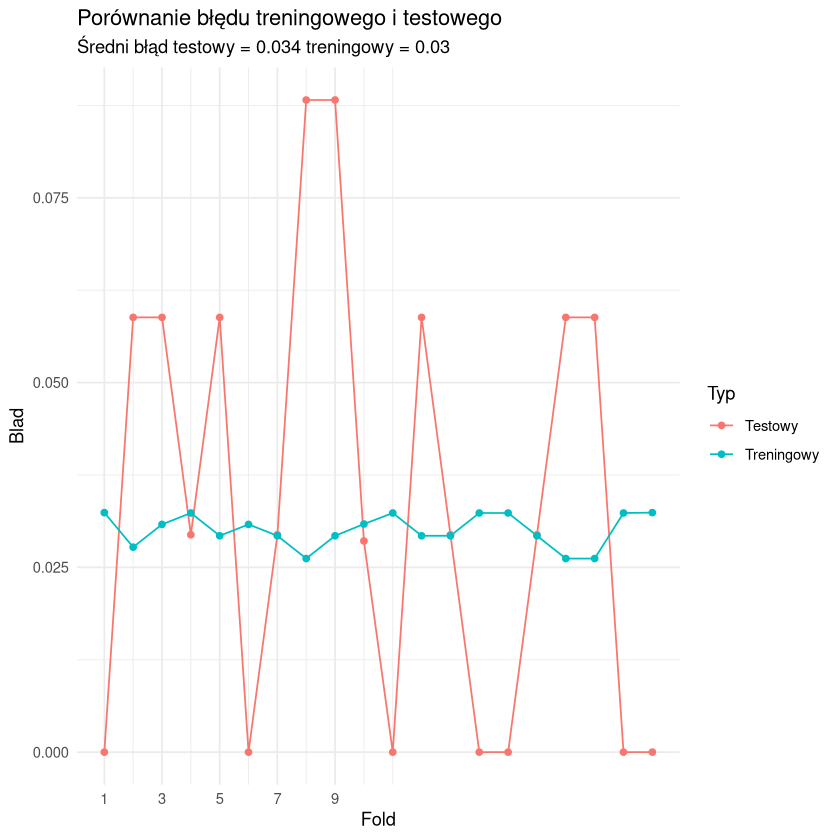

In [39]:
dane_do_wykresu <- data.frame('Fold' = as.integer(rep(1:n, 2)),
                              'Blad' = c(bledy.kfold, bledy.treningowe),
                              'Typ' = rep(c('Testowy', 'Treningowy'), each=n))
ggplot(dane_do_wykresu,
       aes(x=Fold, y=Blad, color=Typ)) + 
  ggtitle('Porównanie błędu treningowego i testowego', 
          subtitle = paste0('Średni błąd testowy = ', round(mean(bledy.kfold), 3), ' treningowy = ', round(mean(bledy.treningowe), 3))) + 
  geom_line() + geom_point() + scale_x_continuous(breaks = c(1,3,5,7,9)) +  theme_minimal() 

In [40]:
train_control <- trainControl(method='cv', number=n)

In [41]:
kfold_train <- train(class~., data=biopsy, 
                     method='glm', family=binomial, trControl=train_control)

In [42]:
print(kfold_train)

Generalized Linear Model 

683 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

No pre-processing
Resampling: Cross-Validated (20 fold) 
Summary of sample sizes: 648, 649, 649, 649, 649, 648, ... 
Resampling results:

  Accuracy  Kappa    
  0.9663    0.9255912



ZADANIE 2

In [45]:
?update

In [46]:
model<-glm(class~.,data=biopsy, family="binomial")

In [53]:
t<-stepAIC(model,trace=TRUE,direction="both",scope = list(upper = ~., lower = ~1))

Start:  AIC=122.89
class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9

       Df Deviance    AIC
- V2    1   102.89 120.89
- V5    1   103.27 121.27
- V3    1   104.74 122.74
<none>      102.89 122.89
- V9    1   106.61 124.61
- V8    1   106.66 124.66
- V4    1   110.31 128.31
- V7    1   110.33 128.33
- V1    1   120.72 138.72
- V6    1   122.07 140.07

Step:  AIC=120.89
class ~ V1 + V3 + V4 + V5 + V6 + V7 + V8 + V9

       Df Deviance    AIC
- V5    1   103.27 119.27
<none>      102.89 120.89
- V9    1   106.66 122.66
- V3    1   106.66 122.66
- V8    1   106.76 122.76
+ V2    1   102.89 122.89
- V4    1   110.64 126.64
- V7    1   110.70 126.70
- V1    1   121.10 137.10
- V6    1   122.07 138.07

Step:  AIC=119.27
class ~ V1 + V3 + V4 + V6 + V7 + V8 + V9

       Df Deviance    AIC
<none>      103.27 119.27
+ V5    1   102.89 120.89
- V9    1   107.14 121.14
+ V2    1   103.27 121.27
- V8    1   107.72 121.72
- V3    1   107.90 121.90
- V7    1   111.69 125.69
- V4    1   112.17 126

In [63]:
tp<-stepAIC(model,trace=TRUE,direction="both",scope = list(upper = ~., lower = ~1),k=log(nrow(biopsy)))

Start:  AIC=168.15
class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9

       Df Deviance    AIC
- V2    1   102.89 161.63
- V5    1   103.27 162.00
- V3    1   104.74 163.48
- V9    1   106.61 165.35
- V8    1   106.66 165.40
<none>      102.89 168.15
- V4    1   110.31 169.05
- V7    1   110.33 169.07
- V1    1   120.72 179.46
- V6    1   122.07 180.81

Step:  AIC=161.63
class ~ V1 + V3 + V4 + V5 + V6 + V7 + V8 + V9

       Df Deviance    AIC
- V5    1   103.27 155.48
- V9    1   106.66 158.87
- V3    1   106.66 158.88
- V8    1   106.76 158.97
<none>      102.89 161.63
- V4    1   110.64 162.86
- V7    1   110.70 162.91
+ V2    1   102.89 168.15
- V1    1   121.10 173.31
- V6    1   122.07 174.28

Step:  AIC=155.48
class ~ V1 + V3 + V4 + V6 + V7 + V8 + V9

       Df Deviance    AIC
- V9    1   107.14 152.83
- V8    1   107.72 153.41
- V3    1   107.90 153.59
<none>      103.27 155.48
- V7    1   111.69 157.37
- V4    1   112.17 157.86
+ V5    1   102.89 161.63
+ V2    1   103.27 162

In [58]:
k=15
train_control <- trainControl(method='cv', number=k)

In [90]:
name<-paste0(names(tp$coefficients)[2:lengths(tp$coefficients),sep="+",collapse = "")
name<-substr(name,1,nchar(name)-1)
name

[1] "V1+V4+V6+V7+V8"

In [98]:
tppred <- train(as.formula(paste("class~",name)), data=biopsy, 
                     method='glm', family=binomial, trControl=train_control)

In [99]:
tppred

Generalized Linear Model 

683 samples
  5 predictor
  2 classes: 'benign', 'malignant' 

No pre-processing
Resampling: Cross-Validated (15 fold) 
Summary of sample sizes: 637, 637, 638, 637, 637, 638, ... 
Resampling results:

  Accuracy   Kappa    
  0.9678261  0.9293614


In [ ]:
acc<-function(list)
{
    
}